###### Name: Zhi Li 

Github Username: ZhiLi055 

USC ID:4474605731

#### For this homework we first include the code for HW3. Content of HW4 starts at Question 2a

In [172]:
import os
import pandas as pd
import numpy as np
from scipy.stats import bootstrap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import warnings

In [3]:
#adjust working directory from where the jupyternote book is to where the data is
os.chdir('../../data/AReM')

## $For\ Question \ 1(a)$

In [4]:
#The file structure of the AReM dataset is as follows
files= os.listdir(os.getcwd())
print(files)

['bending1', 'bending2', 'bendingType.pdf', 'cycling', 'lying', 'sensorsPlacement.pdf', 'sitting', 'standing', 'walking']


## $For \ Question \ 1(b)$

In [5]:
os.chdir('./bending2')

In [6]:
#To clean the dataset 4 in bending2 folder to appropriate format
# with open('dataset4.csv') as f:
#     line = f.read()
#     line1 = line.replace('# Columns: time','#Columns:time')
#     line1 = line1.replace(' ',',')
#     line1 = line1.replace('#Columns:time','# Columns: time')
#     line1 = line1.replace(',\n','\n')
# with open('dataset4.csv','w') as g:
#     g.write(line1) 

In [7]:
test = pd.DataFrame()
train = pd.DataFrame()
for directory in files:
    if '.pdf' not in directory:
        os.chdir('../{}'.format(directory))
        if 'bending' in directory:
            for num in range(1,len(os.listdir(os.getcwd()))+1):
                if num <= 2:
                    test = test.append(pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']),ignore_index=True)
                else:
                    train = train.append(pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']),ignore_index=True)
        else:
            for num in range(1,len(os.listdir(os.getcwd()))+1):
                if num <= 3:
                    test = test.append(pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']),ignore_index=True)
                else:
                    train = train.append(pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23']),ignore_index=True)
                    
print('There are',train.shape[0],'rows and',train.shape[1],'columns in the training set')
print('There are',test.shape[0],'rows and',test.shape[1],'columns in the test set')
print('Head of the training set and test set are displayed as follows')
display(train.head())
display(test.head())

There are 33119 rows and 6 columns in the training set
There are 9120 rows and 6 columns in the test set
Head of the training set and test set are displayed as follows


avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      42.00       0.71      21.25       0.43      30.00       0.00
1      41.50       0.50      20.25       1.48      31.25       1.09
2      41.50       0.50      14.25       1.92      33.00       0.00
3      40.75       0.83      15.75       0.43      33.00       0.00
4      40.00       0.71      20.00       2.74      32.75       0.43

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      39.25       0.43      22.75       0.43      33.75        1.3
1      39.25       0.43      23.00       0.00      33.00        0.0
2      39.25       0.43      23.25       0.43      33.00        0.0
3      39.50       0.50      23.00       0.71      33.00        0.0
4      39.50       0.50      24.00       0.00      33.00        0.0

## $For \ Question \ 1(c)\ i$

#### Commonly used time domain features includes mean, minimum, maximum, variance, median, autoregression coefficients, mean differences, peak to peak distance, zero crossing rate etc.

## $For \ Question \ 1(c)\ ii$

In [8]:
var = ['min','max','mean','median','std','1st quart','3rd quart']
new_var = []
dic = {}
for col in range(1,7):
    for row in range(7):
        name = var[row] + str(col)
        new_var.append(name)
        dic[name] = []
for directory in files:
    if '.pdf' not in directory:
        os.chdir('../{}'.format(directory))
        for num in range(1,len(os.listdir(os.getcwd()))+1):
            data = pd.read_csv('dataset{}.csv'.format(num),skiprows=4).describe()
            data['sort'] = [8,3,5,1,6,4,7,2]
            data = data.sort_values('sort')
            for col in range(1,7):
                for row in range(7):
                    name = var[row] + str(col)
                    dic[name].append(data.iloc[row,col])
                    
table = pd.DataFrame(dic,columns=new_var)
table.insert(0,'Instance',[i for i in range(1,89)])
table = table.set_index('Instance')
table

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  \
Instance                                                                       
1         37.25  45.00  40.624792    40.50  1.476967       39.25     42.0000   
2         38.00  45.67  42.812812    42.50  1.435550       42.00     43.6700   
3         35.00  47.40  43.954500    44.33  1.558835       43.00     45.0000   
4         33.00  47.75  42.179813    43.50  3.670666       39.15     45.0000   
5         33.00  45.75  41.678063    41.75  2.243490       41.33     42.7500   
...         ...    ...        ...      ...       ...         ...         ...   
84        19.50  45.33  33.586875    34.25  4.650935       30.25     37.0000   
85        19.75  45.50  34.322750    35.25  4.752477       31.00     38.0000   
86        19.50  46.00  34.546229    35.25  4.842294       31.25     37.8125   
87        23.50  46.25  34.873229    35.25  4.531720       31.75     38.2500   
88        19.25  44.00  34.473188    35.00  4.796705       31.25     38.0000   

          min2   max2     mean2  ...      std5  1st quart5  3rd quart5  min6  \
Instance                         ...                                           
1          0.0   1.30  0.358604  ...  2.188449     33.0000       36.00  0.00   
2          0.0   1.22  0.372438  ...  1.995255     32.0000       34.50  0.00   
3          0.0   1.70  0.426250  ...  1.999604     35.3625       36.50  0.00   
4          0.0   3.00  0.696042  ...  3.849448     30.4575       36.33  0.00   
5          0.0   2.83  0.535979  ...  2.411026     28.4575       31.25  0.00   
...        ...    ...       ...  ...       ...         ...         ...   ...   
84         0.0  14.67  4.576562  ...  3.283983     13.7300       18.25  0.00   
85         0.0  13.47  4.456333  ...  3.119856     13.5000       17.75  0.00   
86         0.0  12.47  4.371958  ...  2.823124     14.0000       17.75  0.00   
87         0.0  14.82  4.380583  ...  3.131076     13.7500       18.00  0.00   
88         0.0  13.86  4.359312  ...  3.156320     13.7300       17.75  0.43   

           max6     mean6  median6      std6  1st quart6  3rd quart6  
Instance                                                              
1          1.92  0.570583     0.43  0.582915      0.0000      1.3000  
2          3.11  0.571083     0.43  0.601010      0.0000      1.3000  
3          1.79  0.493292     0.43  0.513506      0.0000      0.9400  
4          2.18  0.613521     0.50  0.524317      0.0000      1.0000  
5          1.79  0.383292     0.43  0.389164      0.0000      0.5000  
...         ...       ...      ...       ...         ...         ...  
84         8.32  3.259729     3.11  1.640243      2.0500      4.3225  
85         9.67  3.432562     3.20  1.732727      2.1575      4.5650  
86        10.00  3.338125     3.08  1.656742      2.1600      4.3350  
87         9.51  3.424646     3.27  1.690960      2.1700      4.5000  
88         9.00  3.340458     3.09  1.699114      2.1200      4.3750  

[88 rows x 42 columns]

## $For \ Question \ 1(c)\ iii$

In [9]:
for col in range(len(table.columns)):
    name = table.columns[col]
    data = table.iloc[:,col]
#     if name == 'min2':
    if data.min() == data.max():
        print('The standard deviation of', name, 'is 0','with the corresponding ConfidenceInterval(low=0, high=0)')
        continue
    std = data.std()
    data = (data,)  # samples must be in a sequence
    res = bootstrap(data, np.std, confidence_level=0.9)
    interval = res.confidence_interval
    print('The standard deviation of', name, 'is',round(std,4),'with the corresponding',interval)

The standard deviation of min1 is 9.57 with the corresponding ConfidenceInterval(low=8.540561776763894, high=11.154438031101963)
The standard deviation of max1 is 4.3944 with the corresponding ConfidenceInterval(low=3.520763647230065, high=5.469790823189863)
The standard deviation of mean1 is 5.3357 with the corresponding ConfidenceInterval(low=4.7989910063536, high=5.985726624203493)
The standard deviation of median1 is 5.4401 with the corresponding ConfidenceInterval(low=4.896271284905067, high=6.101888914702878)
The standard deviation of std1 is 1.7722 with the corresponding ConfidenceInterval(low=1.5962521989128668, high=1.9814215723340014)
The standard deviation of 1st quart1 is 6.1536 with the corresponding ConfidenceInterval(low=5.658410385296673, high=6.727054825815483)
The standard deviation of 3rd quart1 is 5.1389 with the corresponding ConfidenceInterval(low=4.43431890410775, high=5.962923441090103)
The standard deviation of min2 is 0 with the corresponding ConfidenceInterva

## $For \ Question \ 1(c)\ iv$

#### We select mean, std and max as the three most important time-domain features. We choose mean because the standard devaiation of mean is lower as compared to min or max. Lower standard deviation may suggest a better quality of the data. We then choose standard deviation to measure the distrubution of the data, whether it spread wide open or concentrated. We also select max since peak data is important in time series data. Especially for this motional data, it measures the peak distance/time of the whole motion.

## $For \ Question \ 2(a)\ i$

In [10]:
#Calculating the corresponding features for the training set
var = ['max','mean', 'std']
index = [1,2,6]
new_var = []
dic = {}
dic['action'] = []
for col in range(3):
    for row in range(3):
        name = var[row] + str(index[col])
        new_var.append(name)
        dic[name] = []
for directory in files:
    if '.pdf' not in directory:
        os.chdir('../{}'.format(directory))
        if 'bending' in directory:
            for num in range(3,len(os.listdir(os.getcwd()))+1):
                data = pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12','var_rss23']).describe()
                data['sort'] = [8,2,3,4,5,6,7,1]
                data = data.sort_values('sort').head(3)
                for col in range(3):
                    for row in range(3):
                        name = var[row] + str(index[col])
                        dic[name].append(data.iloc[row,col])
                dic['action'].append('bending')
        else:
             for num in range(4,len(os.listdir(os.getcwd()))+1):
                data = pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12','var_rss23']).describe()
                data['sort'] = [8,2,3,4,5,6,7,1]
                data = data.sort_values('sort').head(3)
                for col in range(3):
                    for row in range(3):
                        name = var[row] + str(index[col])
                        dic[name].append(data.iloc[row,col])
                dic['action'].append('others')
                    
table = pd.DataFrame(dic,columns=new_var + ['action'])
table.insert(0,'Instance',[i for i in range(1,70)])
table = table.set_index('Instance')

<Figure size 1440x720 with 0 Axes>

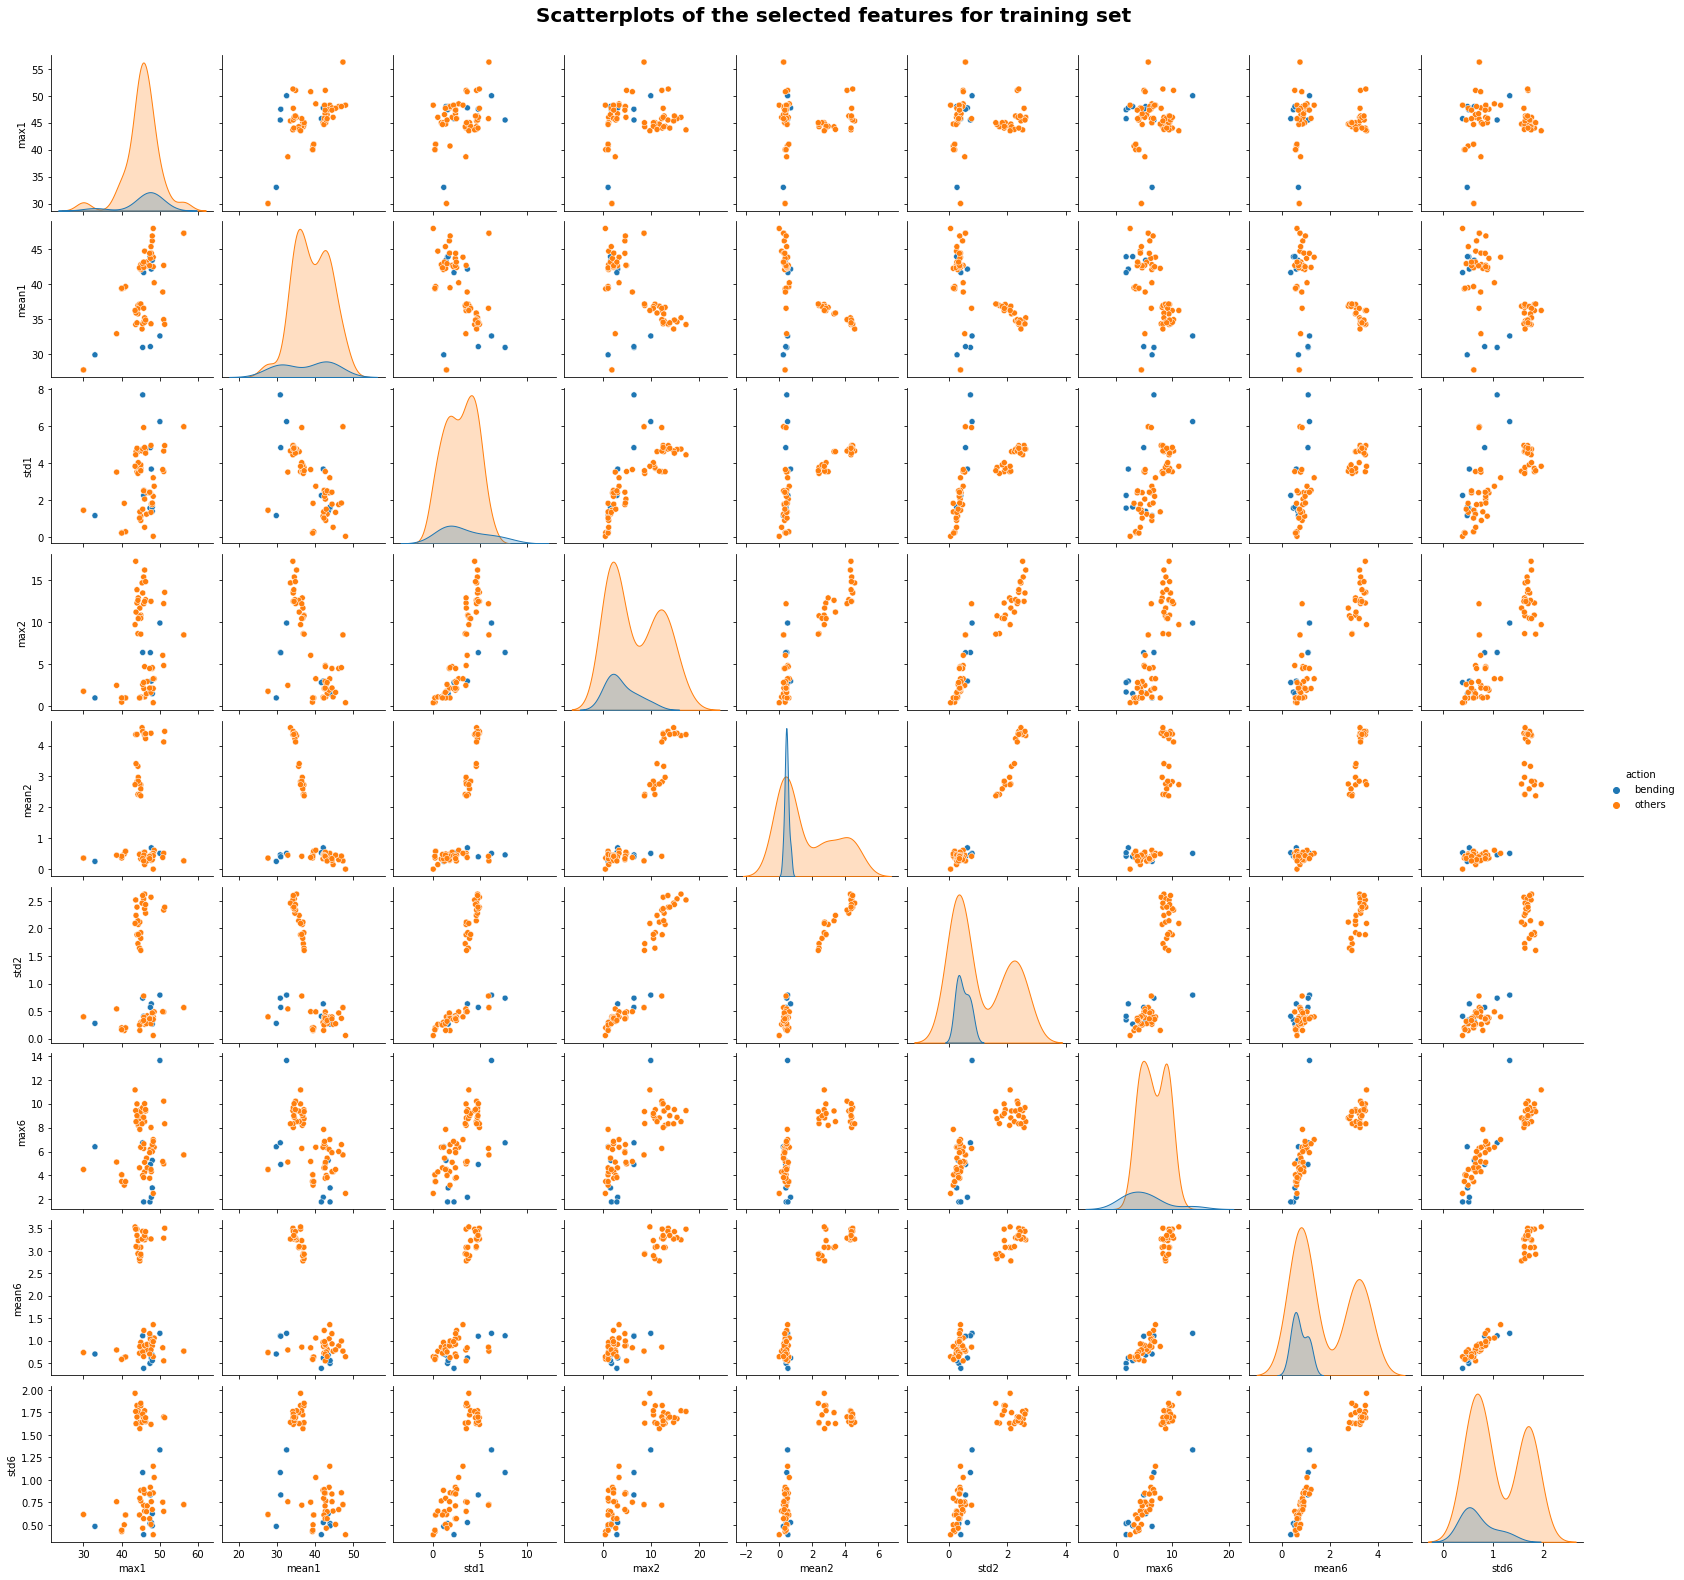

In [11]:
#Create the scatterplots of the independent variables at the same time by using seaborn pairplot function
plt.figure(figsize=(20,10))
pairplot_fig = sns.pairplot(table,vars=['max1', 'mean1', 'std1', 'max2', 'mean2', 'std2', 'max6', 'mean6','std6'], hue='action')
pairplot_fig.fig.suptitle("Scatterplots of the selected features for training set", fontsize=20, weight='bold')
plt.subplots_adjust(top=0.95)

## $For \ Question \ 2(a)\ ii$

In [13]:
var = ['max','mean', 'std']
index = [1,2,6]
new_var = []
dic = {}
dic['action'] = []

for col in range(3):
    for row in range(3):
        name_first_half = var[row] + str(index[col]) + 'first_half'
        name_last_half = var[row] + str(index[col]) + 'last_half'
        new_var.append(name_first_half)
        dic[name_first_half] = []
        new_var.append(name_last_half)
        dic[name_last_half] = []
for directory in files:
    if '.pdf' not in directory:
        os.chdir('../{}'.format(directory))
        if 'bending' in directory:
            for num in range(3,len(os.listdir(os.getcwd()))+1):
                data = pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12','var_rss23'])
                first_half = data.iloc[0:round(data.shape[0]/2),:].rename(columns={'avg_rss12':'avg_rss12_first_half',
                                                                   'var_rss12':'var_rss12_first_half','var_rss23':'var_rss23_first_half'})
                last_half = data.iloc[round(data.shape[0]/2):,:].rename(columns={'avg_rss12':'avg_rss12_last_half',
                                                                   'var_rss12':'var_rss12_last_half','var_rss23':'var_rss23_last_half'})
                data = pd.concat([first_half,last_half.reset_index(drop=True)],axis=1)
                data = data.describe()
                data['sort'] = [8,2,3,4,5,6,7,1]
                data = data.sort_values('sort').head(3)
                for col in range(3):
                    for row in range(3):
                        name_first_half = var[row] + str(index[col]) + 'first_half'
                        name_last_half = var[row] + str(index[col]) + 'last_half'
                        dic[name_first_half].append(data.iloc[row,col])
                        dic[name_last_half].append(data.iloc[row,col+3])
                dic['action'].append('bending')
        else:
             for num in range(4,len(os.listdir(os.getcwd()))+1):
                data = pd.read_csv('dataset{}.csv'.format(num),skiprows=4,usecols=['avg_rss12', 'var_rss12','var_rss23'])
                first_half = data.iloc[0:round(data.shape[0]/2),:].rename(columns={'avg_rss12':'avg_rss12_first_half',
                                                                   'var_rss12':'var_rss12_first_half','var_rss23':'var_rss23_first_half'})
                last_half = data.iloc[round(data.shape[0]/2):,:].rename(columns={'avg_rss12':'avg_rss12_last_half',
                                                                   'var_rss12':'var_rss12_last_half','var_rss23':'var_rss23_last_half'})
                data = pd.concat([first_half,last_half.reset_index(drop=True)],axis=1)
                data = data.describe()
                data['sort'] = [8,2,3,4,5,6,7,1]
                data = data.sort_values('sort').head(3)
                for col in range(3):
                    for row in range(3):
                        name_first_half = var[row] + str(index[col]) + 'first_half'
                        name_last_half = var[row] + str(index[col]) + 'last_half'
                        dic[name_first_half].append(data.iloc[row,col])
                        dic[name_last_half].append(data.iloc[row,col+3])
                dic['action'].append('others')
                    
table = pd.DataFrame(dic,columns=new_var + ['action'])
table.insert(0,'Instance',[i for i in range(1,70)])
table = table.set_index('Instance')

<Figure size 1440x720 with 0 Axes>

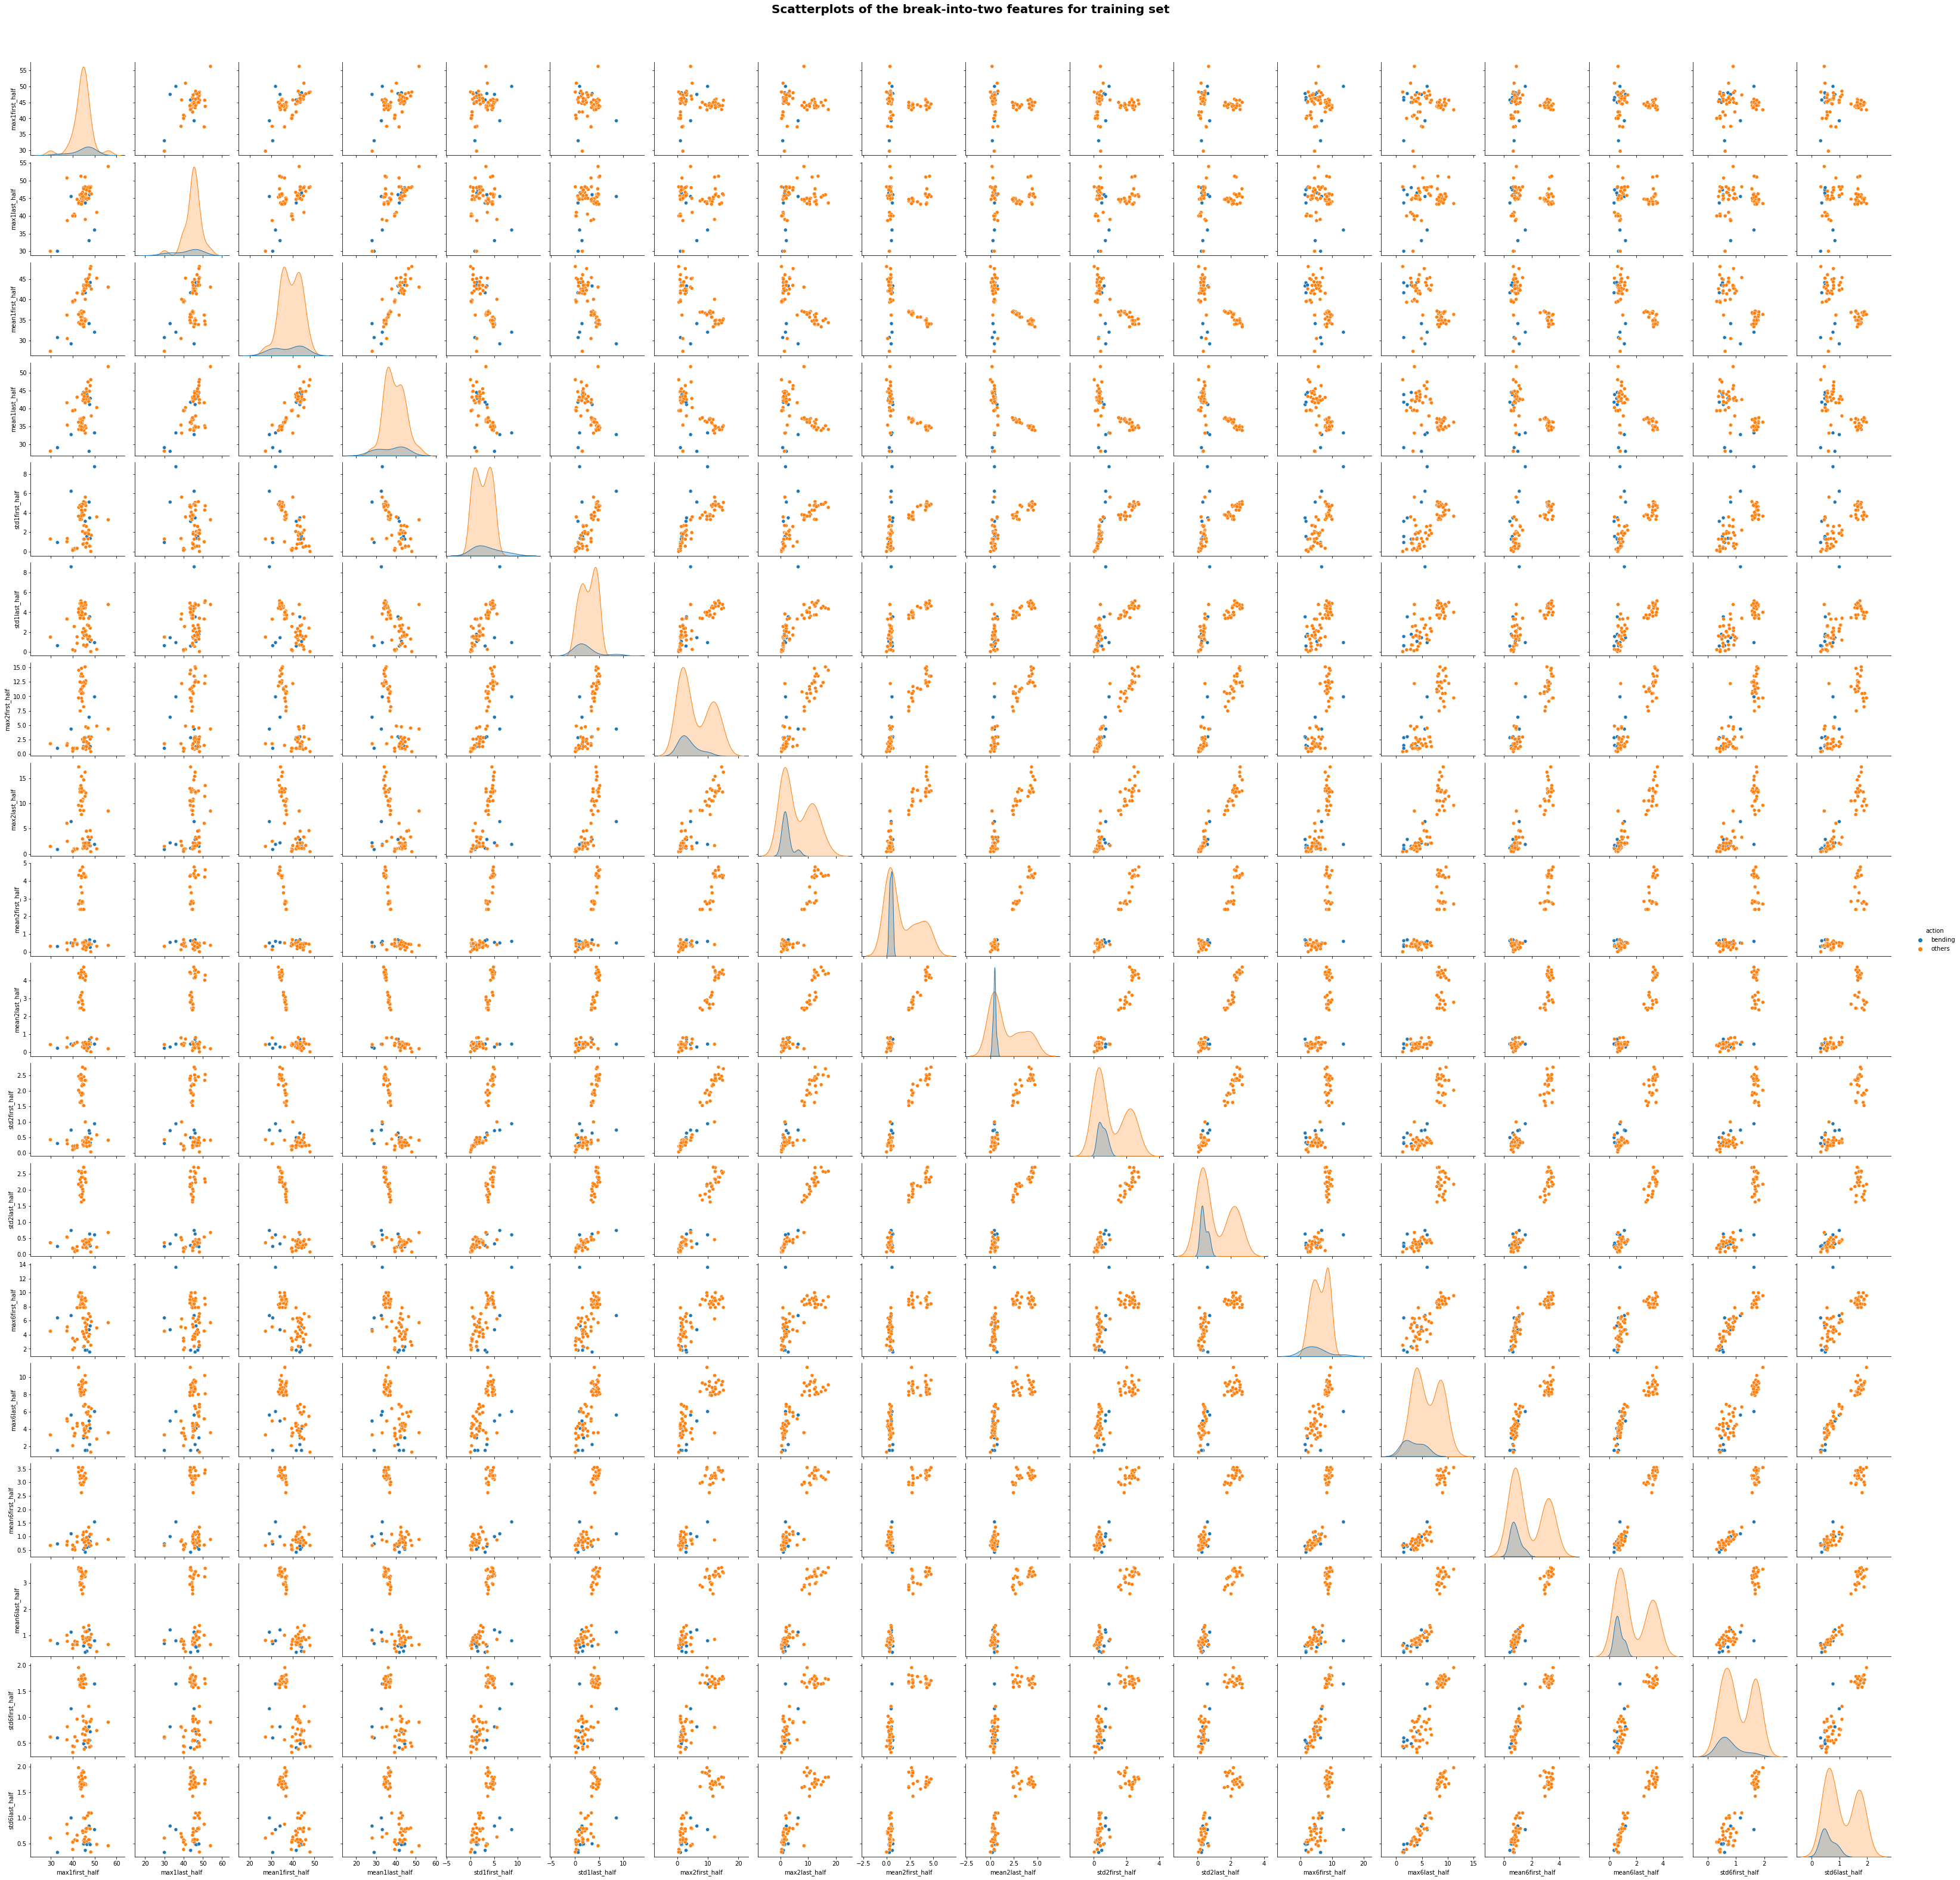

In [21]:
#Create the scatterplots of the independent variables at the same time by using seaborn pairplot function
plt.figure(figsize=(20,10))
pairplot_fig = sns.pairplot(table,vars=list(table.columns)[:-1], hue='action')
pairplot_fig.fig.suptitle("Scatterplots of the break-into-two features for training set", fontsize=20, weight='bold')
plt.subplots_adjust(top=0.95)

#### No, we do not see any considerable difference in the results with those of 2(a)i

## $For \ Question \ 2(a)\ iii$

#### The wrong way to perform cross validation is to for each l, find the best p estimators first and then use cross validation on logistic regression of the same p estimators. This is the wrong way since we ignore the fact that in the procedure of selecting p estimators in the first step has already seen the labels of the training data, and made use of them. This is a form of training and must be included in the validation process. Therefore the right way is to use cross validation both when selecting p estimators and logistic regression process. Specifically, the right way is as follows.

In [137]:
def break_into_l_series(l_value):
    train = pd.DataFrame()
    for directory in files:
        if '.pdf' not in directory:
            os.chdir('../{}'.format(directory))
            if 'bending' in directory:
                for num_file in range(1,len(os.listdir(os.getcwd()))+1):
                    if num_file > 2:
                        data = pd.read_csv('dataset{}.csv'.format(num_file),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
           'avg_rss23', 'var_rss23'])
                        for l in range(1,l_value+1):
                            quotient = int(len(data)/l)
                            remainder = len(data)%l
                            number = [quotient] * (l - remainder) + [quotient + 1] * remainder
                        start = 0
                        num = 1
                        new_data = pd.DataFrame()
                        for interval in number:
                            snippet = data.iloc[start:start+interval,:]
                            snippet = snippet.rename(columns={data.columns[0]: data.columns[0]+'_'+str(num),data.columns[1]: data.columns[1]+'_'+str(num),
                                                    data.columns[2]: data.columns[2]+'_'+str(num),data.columns[3]: data.columns[3]+'_'+str(num),
                                                   data.columns[4]: data.columns[4]+'_'+str(num),data.columns[5]: data.columns[5]+'_'+str(num)})
                            start += interval
                            num += 1
                            new_data = pd.concat([new_data,snippet.reset_index(drop=True)],axis=1)
                        new_data['action'] = 'bending'
                        train = train.append(new_data,ignore_index=True)

            else:
                for num_file in range(1,len(os.listdir(os.getcwd()))+1):
                    if num_file > 3:
                        data = pd.read_csv('dataset{}.csv'.format(num_file),skiprows=4,usecols=['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
           'avg_rss23', 'var_rss23'])
                        for l in range(1,l_value+1):
                            quotient = int(len(data)/l)
                            remainder = len(data)%l
                            number = [quotient] * (l - remainder) + [quotient + 1] * remainder
                        start = 0
                        num = 1
                        new_data = pd.DataFrame()
                        for interval in number:
                            snippet = data.iloc[start:start+interval,:]
                            snippet = snippet.rename(columns={data.columns[0]: data.columns[0]+'_'+str(num),data.columns[1]: data.columns[1]+'_'+str(num),
                                                    data.columns[2]: data.columns[2]+'_'+str(num),data.columns[3]: data.columns[3]+'_'+str(num),
                                                   data.columns[4]: data.columns[4]+'_'+str(num),data.columns[5]: data.columns[5]+'_'+str(num)})
                            start += interval
                            num += 1
                            new_data = pd.concat([new_data,snippet.reset_index(drop=True)],axis=1)
                        new_data['action'] = directory
                        train = train.append(new_data,ignore_index=True)
    return train

In [175]:
warnings.filterwarnings("ignore")
model = LogisticRegression(penalty='none',max_iter=50)
result = []
for i in range(1,21):
    train = break_into_l_series(i)
    train = train.dropna(axis=0, how='any')
    X = train.iloc[:,:-1]
    y = train.iloc[:,-1]
    rfecv = RFECV(estimator=model,step=1,cv=StratifiedKFold(5),scoring="accuracy")
    rfecv.fit(X, y)
    result.append([rfecv.n_features_,rfecv.grid_scores_])

In [183]:
l = 1
for j in result:
    print('The best p for l equal',l,'is',j[0],'with corresponding validation score',round(j[1][j[0]-1],2))
    l += 1

The best p for l equal 1 is 6 with corresponding validation score 0.59
The best p for l equal 2 is 11 with corresponding validation score 0.67
The best p for l equal 3 is 17 with corresponding validation score 0.71
The best p for l equal 4 is 19 with corresponding validation score 0.72
The best p for l equal 5 is 22 with corresponding validation score 0.73
The best p for l equal 6 is 18 with corresponding validation score 0.75
The best p for l equal 7 is 18 with corresponding validation score 0.77
The best p for l equal 8 is 24 with corresponding validation score 0.76
The best p for l equal 9 is 47 with corresponding validation score 0.78
The best p for l equal 10 is 19 with corresponding validation score 0.78
The best p for l equal 11 is 58 with corresponding validation score 0.8
The best p for l equal 12 is 69 with corresponding validation score 0.8
The best p for l equal 13 is 70 with corresponding validation score 0.79
The best p for l equal 14 is 78 with corresponding validation s

## $For \ Question \ 2(a)\ iv$

#### Therefore we can tell that the best (l,p) is (20,99) with highest overall validaton score which is 0.83

## $For \ Question \ 4.8.3$

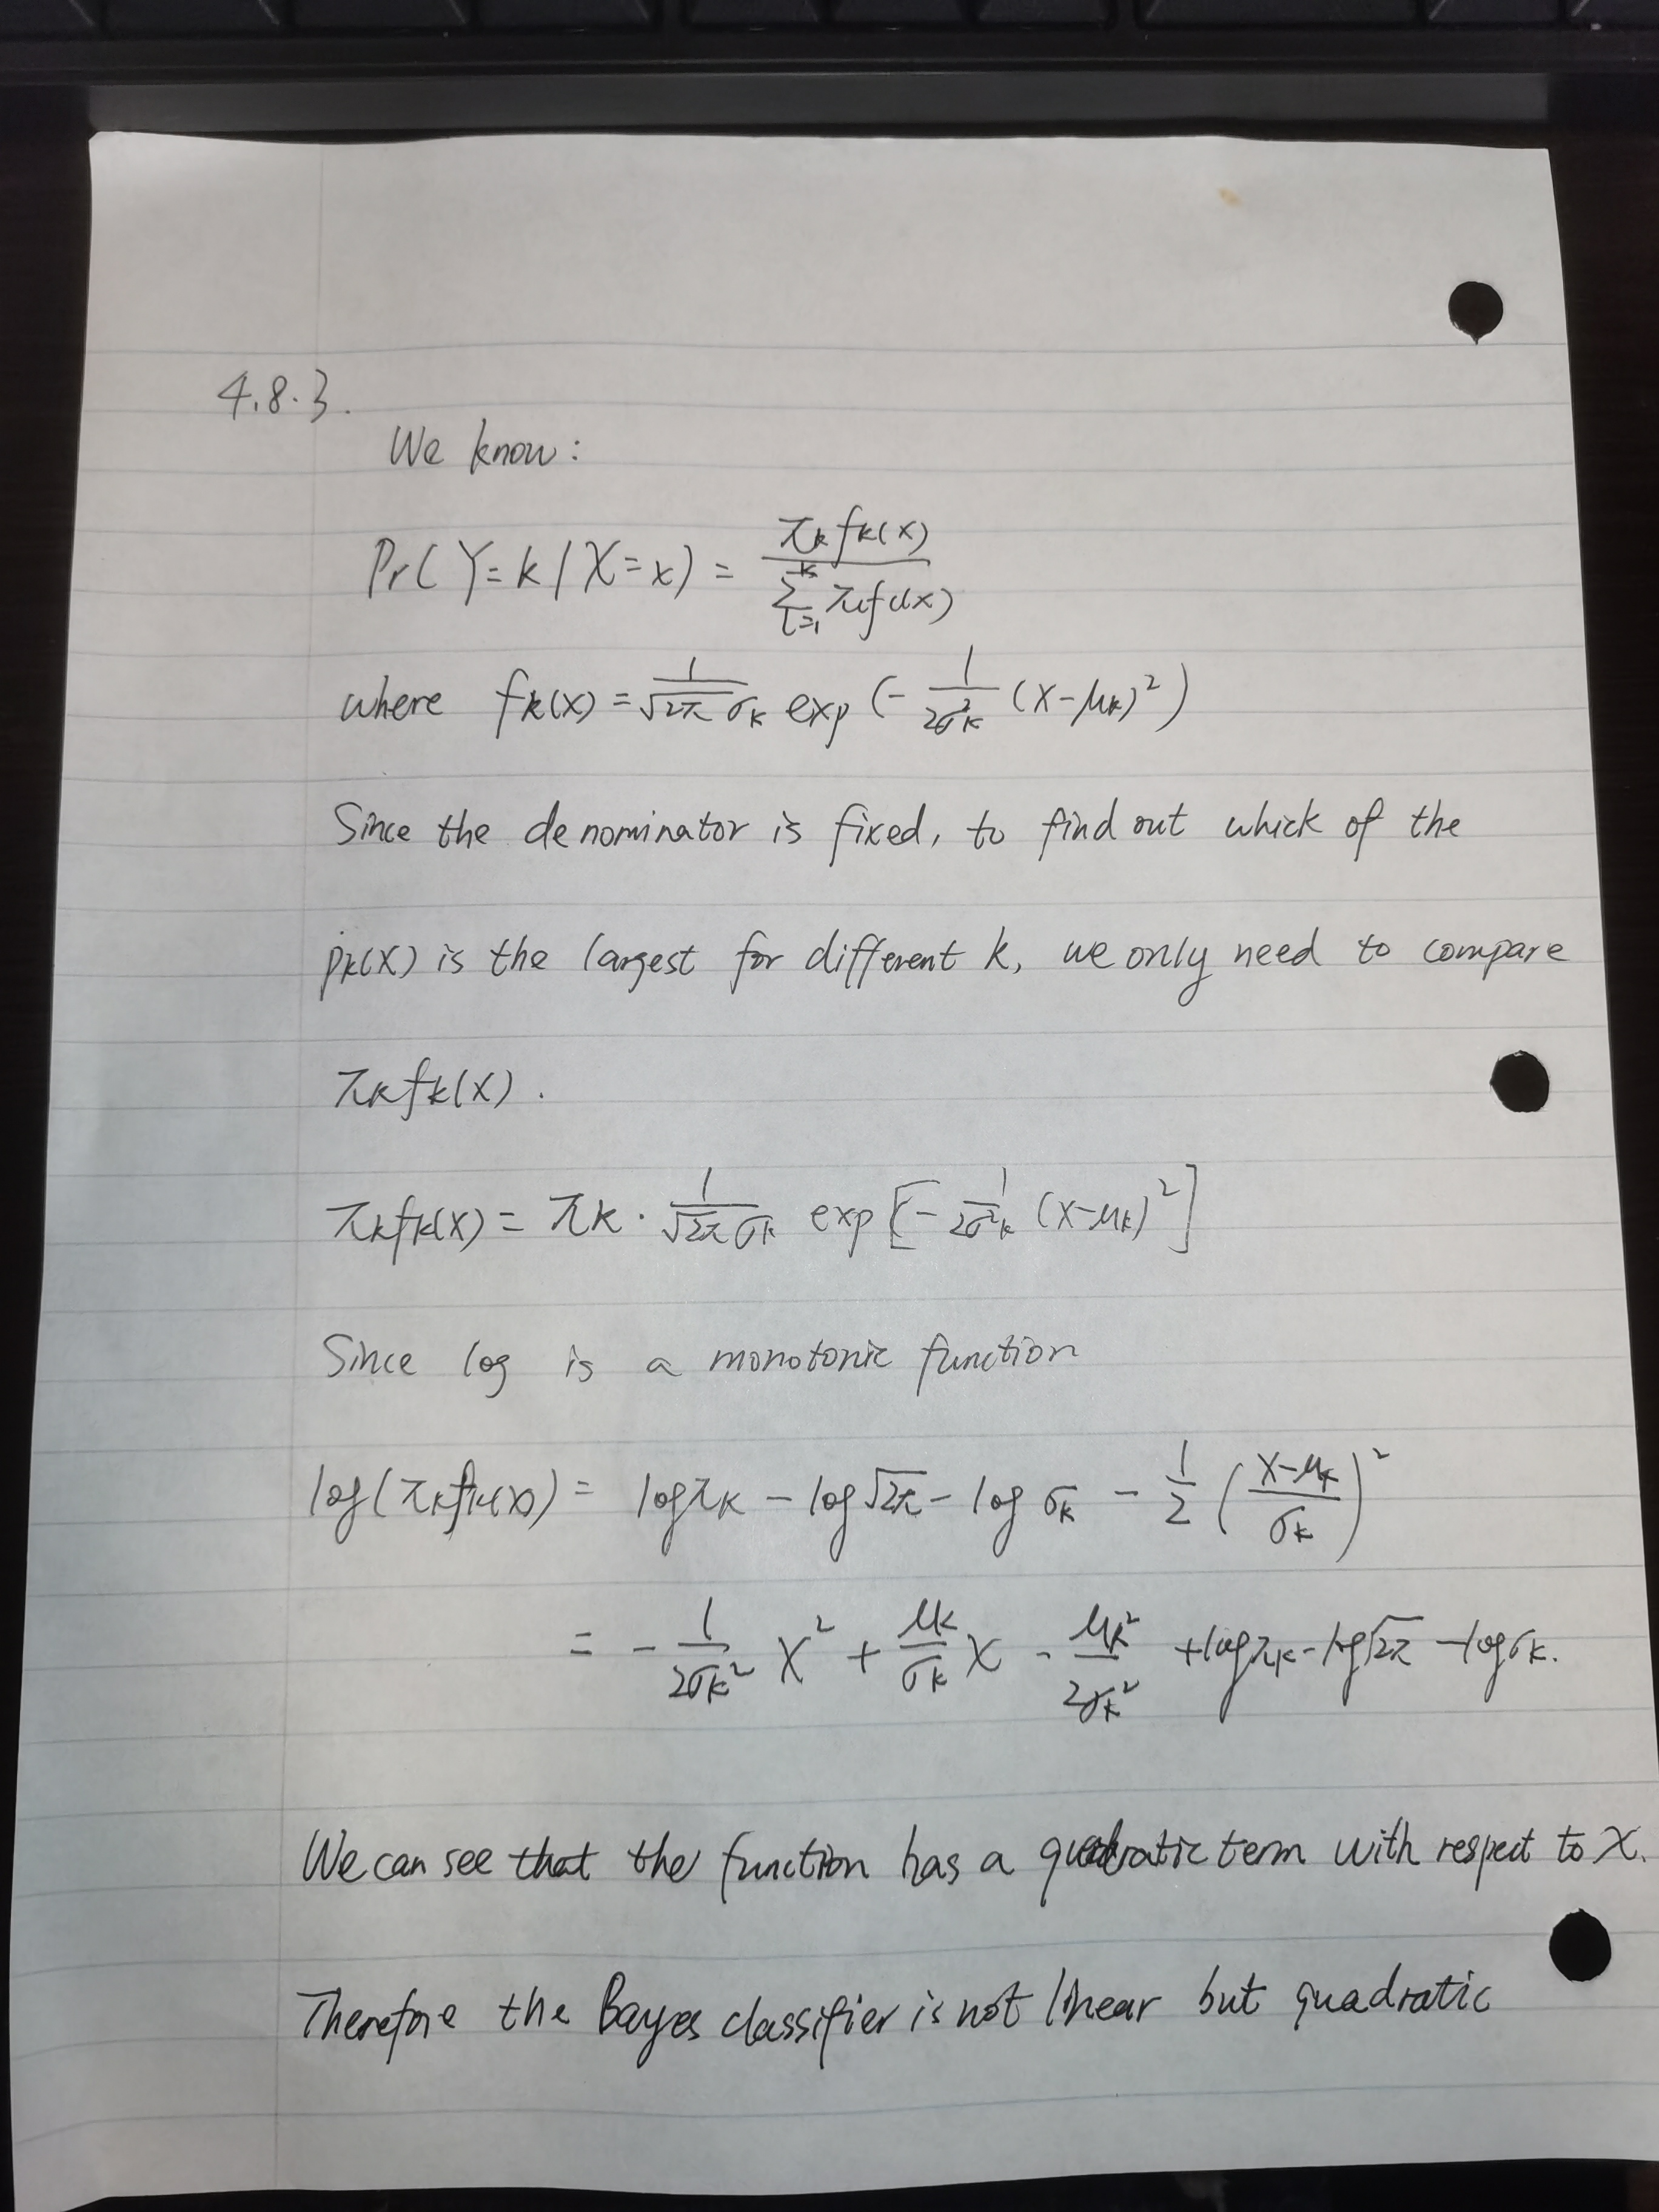

## $For \ Question \ 4.8.7$

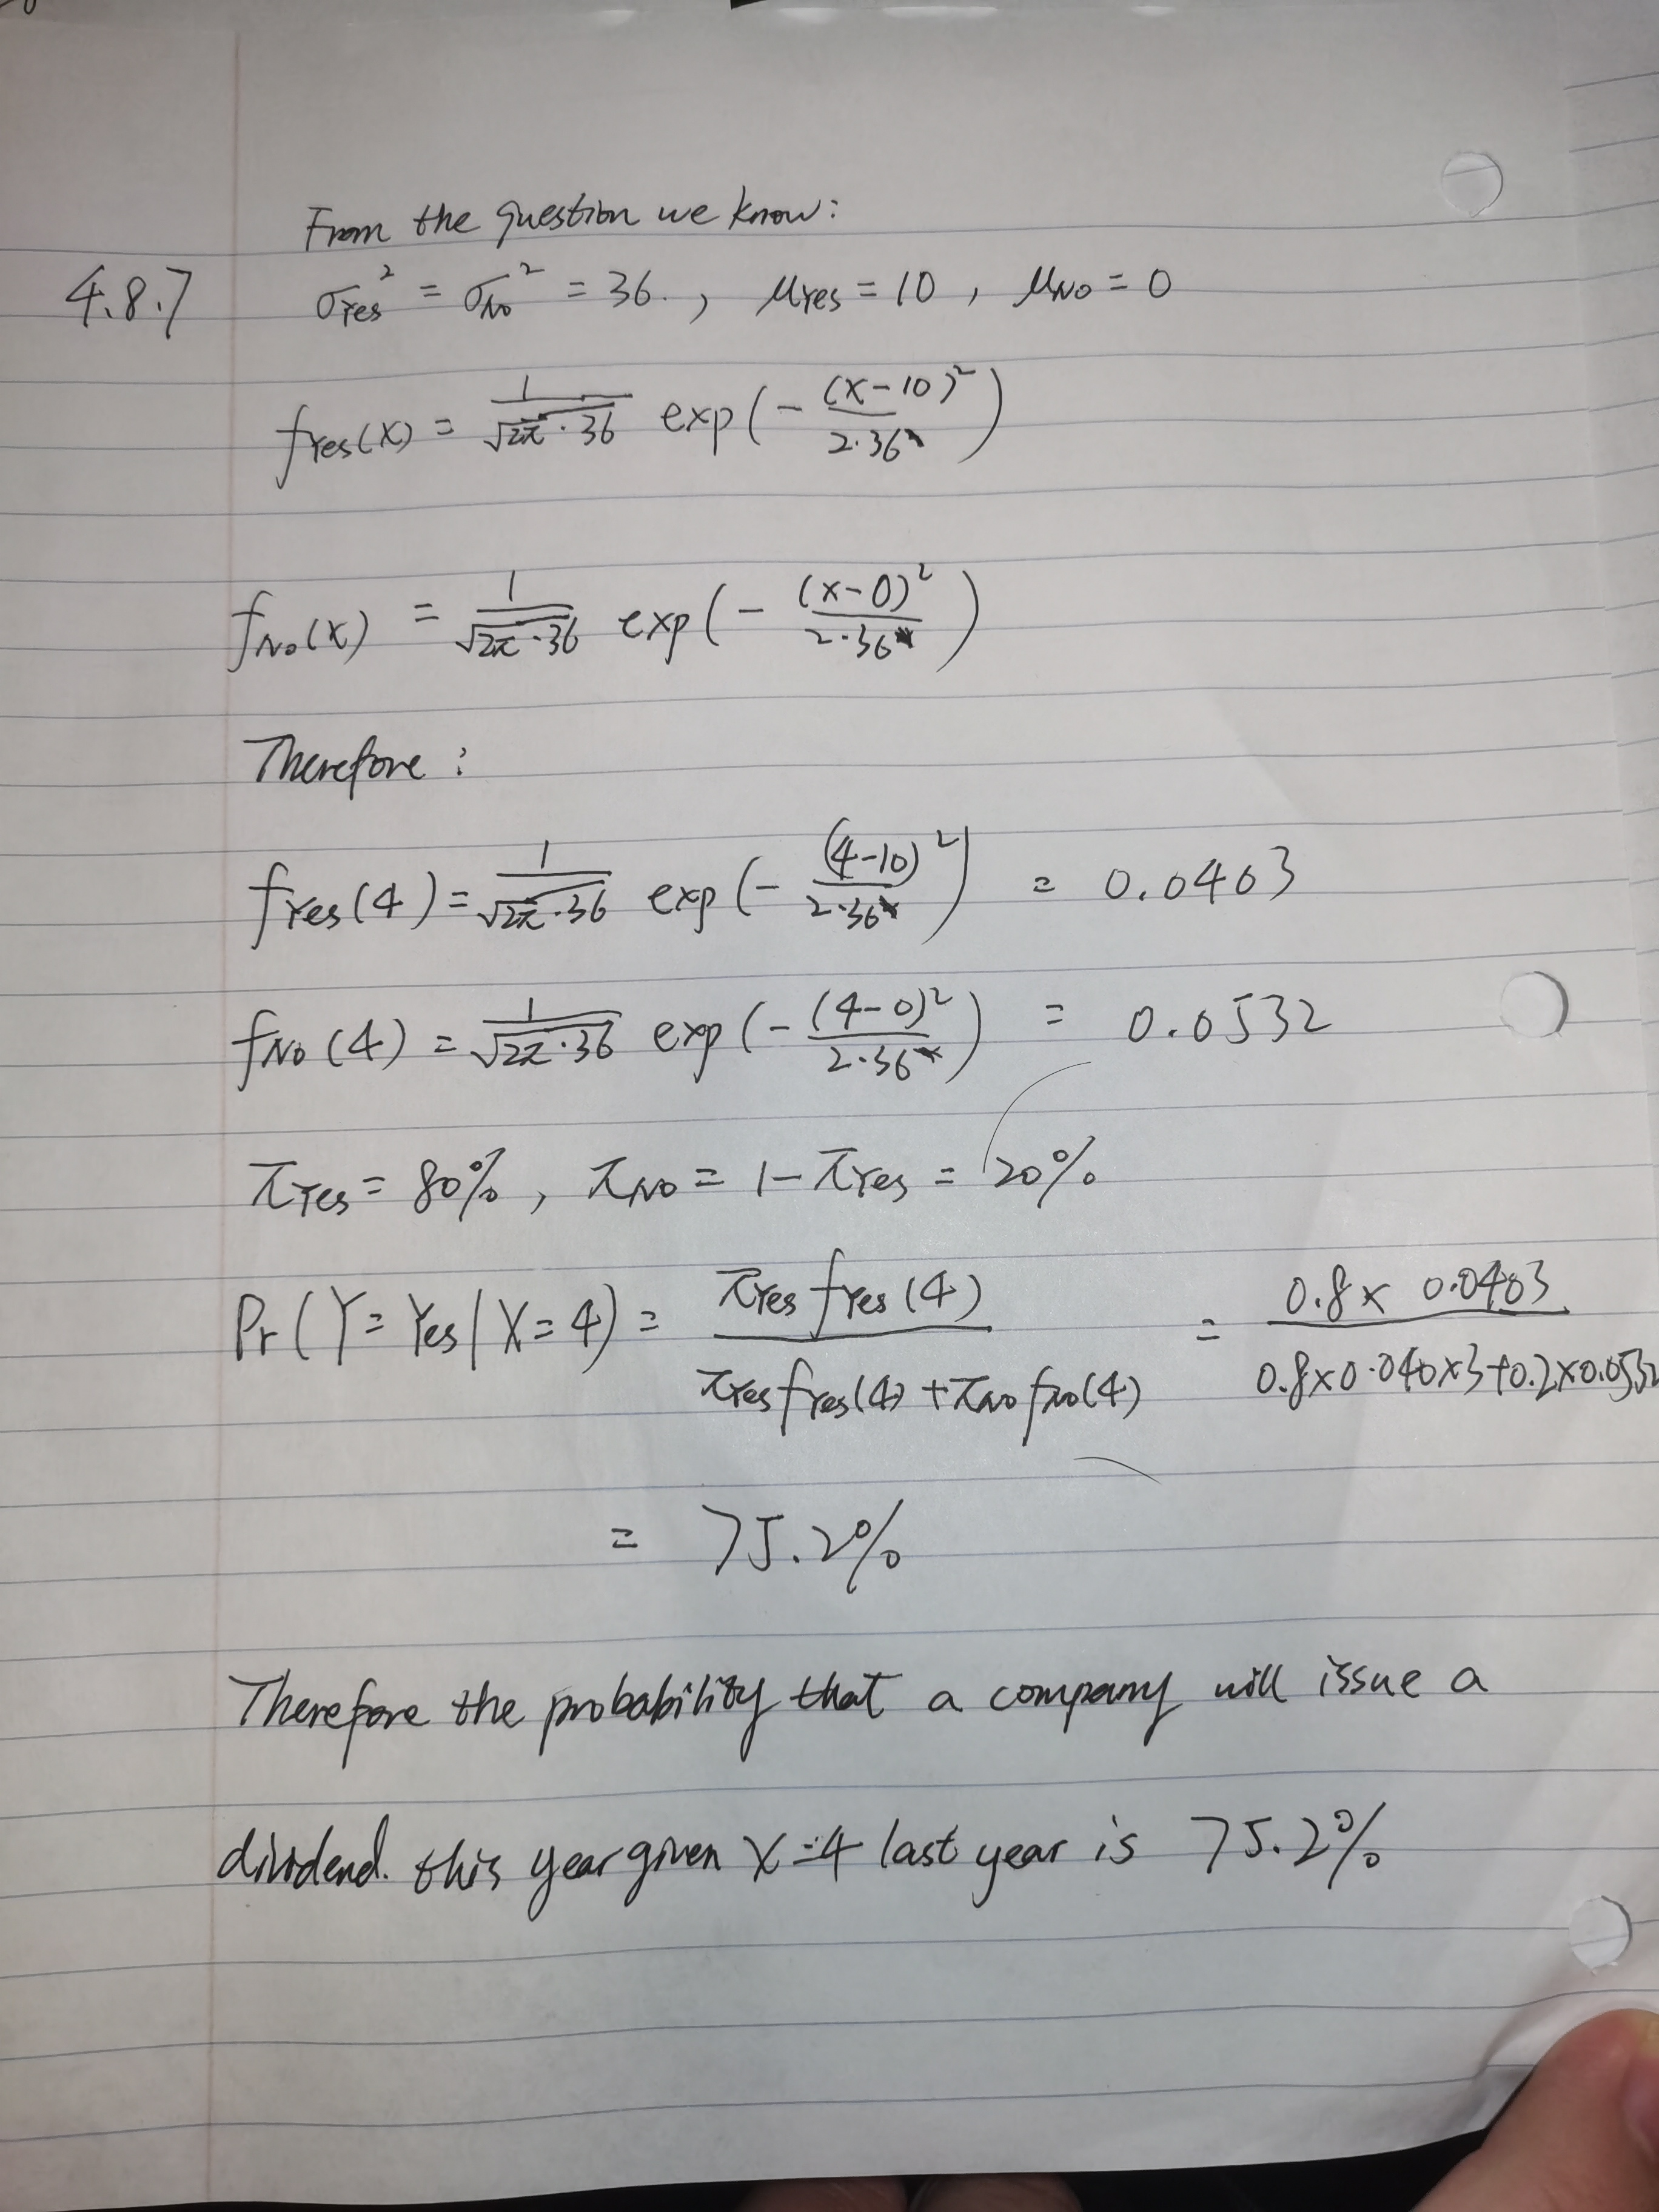